Impoting libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [3]:
df=pd.read_csv('titanic.csv')

Exploring the dataset

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Feature Selection

In [9]:
target=df['Survived']

In [10]:
df_target=pd.DataFrame(target)

In [11]:
df.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [12]:
df.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


Encoding the categorical data into numerical data

In [13]:
from sklearn.preprocessing import LabelEncoder
Sex = LabelEncoder()
df['Sex_num'] = Sex.fit_transform(df['Sex'])

In [14]:
df.head()

,Pclass,Sex,Age,Fare,Sex_num
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [15]:
df.drop('Sex',axis='columns',inplace=True)

In [16]:
df.head()

,Pclass,Age,Fare,Sex_num
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


Checking for NaN values

In [17]:
df.isnull().sum()

Pclass       0
Age        177
Fare         0
Sex_num      0
dtype: int64

Checking for outliers

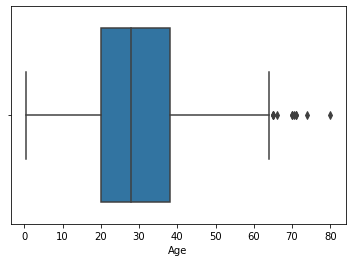

In [18]:
boxplot=sns.boxplot(x=df['Age'],orient="h",whis=1.5)

Since outliers are present, impute the NaN values with median

In [19]:
df['Age']=df['Age'].replace(np.nan,df.Age.median())

In [20]:
df.isnull().sum()

Pclass     0
Age        0
Fare       0
Sex_num    0
dtype: int64

Splitting the dataset into train and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df,df_target,test_size=0.25)

Building a Decision Tree Model and predicting Y

In [22]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)

In [23]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
Y_pred=model.predict(X_test)

Testing the accuracy of the model

In [25]:
model.score(X_test,Y_test)

0.8251121076233184

Visualizing the Decision Tree Model

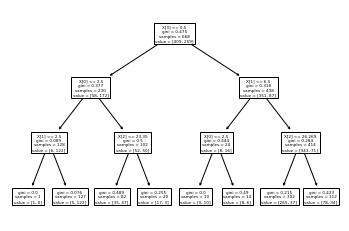

In [26]:
tree.plot_tree(model);